In [1]:
import pandas as pd
import streamlit as st
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_countries = pd.read_csv('countries_per_capita.csv')

In [3]:
df_countries

,Unnamed: 0,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,...,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,No Footprint Component Data,No Biocapacity Component Data
0,0,Luxembourg,European Union,0.52,0.89,114665.00,1.10,0.76,1.03,12.65,...,0.89,0.00,0.14,1.68,-14.14,9.14,9.44,5,NaN,NaN
1,1,Aruba,Latin America,0.10,NaN,NaN,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.57,-11.31,6.86,20.69,2,11.88,11.88
2,2,Qatar,Middle East/Central Asia,2.05,0.85,99431.50,0.57,0.27,0.15,9.57,...,0.00,1.17,0.06,1.24,-9.56,6.24,8.72,3L,NaN,NaN
3,3,Australia,Asia-Pacific,23.05,0.93,66604.20,2.68,0.63,0.89,4.85,...,2.01,3.19,0.14,16.57,7.26,5.37,0.56,5,NaN,NaN
4,4,United States of America,North America,317.50,0.91,49725.00,1.13,0.30,0.67,5.90,...,1.57,0.33,0.09,3.76,-4.46,4.75,2.19,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,Pakistan,Asia-Pacific,179.16,0.53,1218.60,0.27,0.01,0.08,0.38,...,0.01,0.04,0.03,0.35,-0.44,0.46,2.28,6,NaN,NaN
184,184,Bangladesh,Asia-Pacific,154.70,0.56,857.50,0.29,0.00,0.08,0.26,...,0.00,0.05,0.07,0.38,-0.35,0.42,1.92,6,NaN,NaN
185,185,Haiti,Latin America,10.17,0.48,749.13,0.27,0.04,0.10,0.15,...,0.01,0.01,0.03,0.27,-0.34,0.35,2.28,6,NaN,NaN
186,186,Timor-Leste,Asia-Pacific,1.11,0.60,5167.86,0.25,0.07,0.04,0.06,...,0.52,0.94,0.04,1.78,1.30,0.28,0.27,3B,NaN,NaN


In [4]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      188 non-null    int64  
 1   Country                         188 non-null    object 
 2   Region                          188 non-null    object 
 3   Population (millions)           188 non-null    float64
 4   HDI                             172 non-null    float64
 5   GDP per Capita                  173 non-null    float64
 6   Cropland Footprint              188 non-null    float64
 7   Grazing Footprint               188 non-null    float64
 8   Forest Footprint                188 non-null    float64
 9   Carbon Footprint                188 non-null    float64
 10  Fish Footprint                  188 non-null    float64
 11  Total Ecological Footprint      188 non-null    float64
 12  Cropland                        188 

In [5]:
df_countries = df_countries.dropna(subset = ['Population (millions)', 'HDI', 'GDP per Capita'])

2021-05-02 21:48:12.015 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


In [6]:
df_countries

,Unnamed: 0,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,...,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,No Footprint Component Data,No Biocapacity Component Data
0,0,Luxembourg,European Union,0.52,0.89,114665.00,1.10,0.76,1.03,12.65,...,0.89,0.00,0.14,1.68,-14.14,9.14,9.44,5,NaN,NaN
2,2,Qatar,Middle East/Central Asia,2.05,0.85,99431.50,0.57,0.27,0.15,9.57,...,0.00,1.17,0.06,1.24,-9.56,6.24,8.72,3L,NaN,NaN
3,3,Australia,Asia-Pacific,23.05,0.93,66604.20,2.68,0.63,0.89,4.85,...,2.01,3.19,0.14,16.57,7.26,5.37,0.56,5,NaN,NaN
4,4,United States of America,North America,317.50,0.91,49725.00,1.13,0.30,0.67,5.90,...,1.57,0.33,0.09,3.76,-4.46,4.75,2.19,6,NaN,NaN
5,5,Canada,North America,34.84,0.91,52145.40,1.46,0.33,1.20,5.00,...,9.12,3.41,0.07,16.01,7.83,4.72,0.51,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,Pakistan,Asia-Pacific,179.16,0.53,1218.60,0.27,0.01,0.08,0.38,...,0.01,0.04,0.03,0.35,-0.44,0.46,2.28,6,NaN,NaN
184,184,Bangladesh,Asia-Pacific,154.70,0.56,857.50,0.29,0.00,0.08,0.26,...,0.00,0.05,0.07,0.38,-0.35,0.42,1.92,6,NaN,NaN
185,185,Haiti,Latin America,10.17,0.48,749.13,0.27,0.04,0.10,0.15,...,0.01,0.01,0.03,0.27,-0.34,0.35,2.28,6,NaN,NaN
186,186,Timor-Leste,Asia-Pacific,1.11,0.60,5167.86,0.25,0.07,0.04,0.06,...,0.52,0.94,0.04,1.78,1.30,0.28,0.27,3B,NaN,NaN


In [7]:
# df_country_properties = df_countries.loc[:, 'Population (millions)':'Total Biocapacity']
# df_country_properties

In [8]:
df_countries.dropna()

,Unnamed: 0,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,...,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,No Footprint Component Data,No Biocapacity Component Data
15,15,Estonia,European Union,1.29,0.85,17304.40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.53,3.67,3.96,0.65,3T,6.86,6.86
21,21,Finland,European Union,5.41,0.88,50960.20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.44,7.57,3.39,0.44,3T,5.87,5.87
35,35,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.94,-4.44,3.11,5.70,2,5.38,5.38
42,42,Norway,Northern/Eastern Europe,4.99,0.94,100172.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.18,3.19,2.88,0.61,4,4.98,4.98
78,78,Saint Vincent and Grenadines,Latin America,0.11,0.72,6171.48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.26,-1.85,1.79,2.47,2,3.11,3.11
81,81,Grenada,Latin America,0.10,0.74,7410.48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.96,-1.01,1.72,1.52,3L,2.98,2.98
100,100,Cabo Verde,Africa,0.49,0.64,3801.45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.62,-1.90,1.46,4.06,3T,2.52,2.52
110,110,Djibouti,Africa,0.86,0.46,1433.17,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.77,-1.42,1.27,2.84,2,2.19,2.19
158,158,Cambodia,Asia-Pacific,14.86,0.55,877.64,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.09,-0.11,0.70,1.11,3T,1.21,1.21


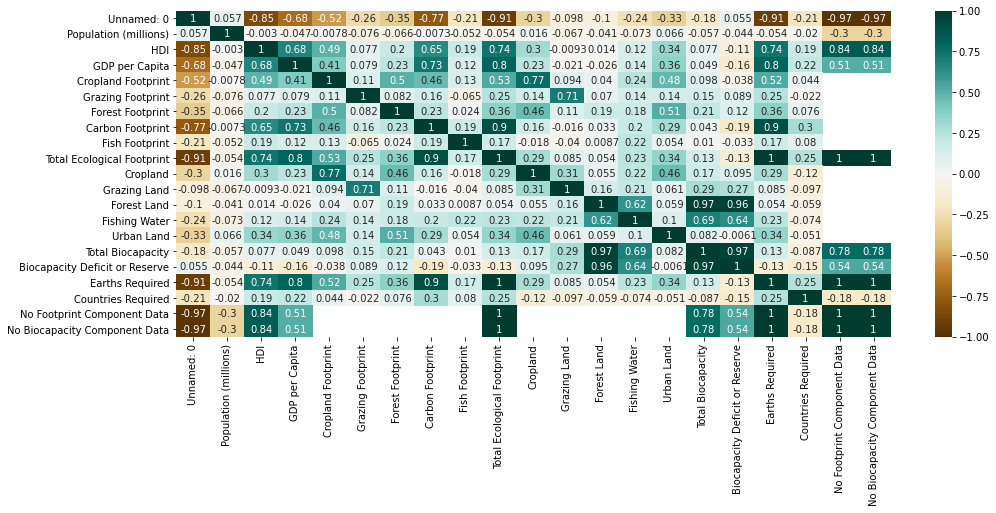

In [9]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df_countries.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

In [10]:
df_countries[df_countries['Population (millions)'] == df_countries['Population (millions)'].min()]

,Unnamed: 0,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,...,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,No Footprint Component Data,No Biocapacity Component Data
43,43,Saint Kitts and Nevis,Latin America,0.05,0.74,12952.5,0.51,0.18,0.09,3.34,...,0.17,0.38,0.0,0.62,-4.31,2.85,7.92,3L,NaN,NaN


In [25]:
#We were wondering what the total ecological impact 

# base = alt.Chart(df_countries).mark_circle(color="black").encode(
#         alt.X("HDI"), alt.Y("Total Ecological Footprint")
# )

degree_list = [1]

base = alt.Chart(df_countries).mark_circle(size=60).encode(
    x='HDI',
    y =alt.Y('Total Ecological Footprint', title='Per Capita Ecological Footprint'),
    color='Region:N',
    tooltip=['Country', 'Region', alt.Tooltip('Total Ecological Footprint', title='Ecological Footprint'), 'HDI']
).properties(
    title='Hello'
)

polynomial_fit = [
    base.transform_regression(
        "HDI", "Total Ecological Footprint", method="poly", order=order, as_=["HDI", str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=["degree", "Total Ecological Footprint"])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

polynomial_fits = alt.layer(*polynomial_fit)
alt.layer(base, polynomial_fits).resolve_scale(color='independent').interactive()

alt.LayerChart(...)

In [12]:
base

alt.Chart(...)

In [22]:
exp = base + base.transform_regression("HDI", "Total Ecological Footprint", method="exp", as_=['HDI', 'exponential']).mark_line().transform_fold(["exponential"], as_=["Regression", "Total Ecological Footprint"]).encode(alt.Color("Regression:N"))
exp = exp.interactive()
exp

alt.LayerChart(...)

In [14]:
base1 = alt.Chart(df_countries).mark_circle(size=60).encode(
    x='GDP per Capita',
    y =alt.Y('Total Ecological Footprint', title='Per Capita Ecological Footprint'),
    color='Region:N',
    tooltip=['Country', 'Region', alt.Tooltip('Total Ecological Footprint', title='Ecological Footprint'), 'GDP per Capita']
)

base1.interactive()

alt.Chart(...)

In [20]:
log = base1 + base1.transform_regression("GDP per Capita", "Total Ecological Footprint", method="log", as_=['GDP per Capita', 'log']).mark_line().transform_fold(["log"], as_=["Regression", "Total Ecological Footprint"]).encode(alt.Color("Regression:N"))
log.interactive()

alt.LayerChart(...)